# Data Science Project Based on Australian Vehicle Prices Dataset

Sulaiman Yusuf Zakaria 47895810

## Dataset Description:

This dataset contains the latest information on car prices in Australia for the year 2023. It covers various brands, models, types, and features of cars sold in the Australian market. It provides useful insights into the trends and factors influencing the car prices in Australia. The dataset includes information such as brand, year, model, car/suv, title, used/new, transmission, engine, drive type, fuel type, fuel consumption, kilometres, colour (exterior/interior), location, cylinders in engine, body type, doors, seats, and price. The dataset has over 16,000 records of car listings from various online platforms in Australia.

* Brand: Name of the car manufacturer
* Year: Year of manufacture or release
* Model: Name or code of the car model
* Car/Suv: Type of the car (car or suv)
* Title: Title or description of the car
* UsedOrNew: Condition of the car (used or new)
* Transmission: Type of transmission (manual or automatic)
* Engine: Engine capacity or power (in litres or kilowatts)
* DriveType: Type of drive (front-wheel, rear-wheel, or all-wheel)
* FuelType: Type of fuel (petrol, diesel, hybrid, or electric)
* FuelConsumption: Fuel consumption rate (in litres per 100 km)
* Kilometres: Distance travelled by the car (in kilometres)
* ColourExtInt: Colour of the car (exterior and interior)
* Location: Location of the car (city and state)
* CylindersinEngine: Number of cylinders in the engine
* B odyType: Shape or style of the car body (sedan, hatchback, coupe, etc.)
* Doors: Number of doors in the car
* Seats: Number of seats in the car
* Price: Price of the car (in Australian dollars)


## AIM:

We would like to predict the price of the car base on the cars' features (e.g. manufacture year, transmission, engine). Meanwhile, we we like to compare the performance of different regresion models.


## Import Libraries

Here we import all the libraries we need.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# this is used for random seed
student_id = 47895810

## Data Loading

We load in the CSV file and print the table head of the source data to check what kind of feature data has been included.

In [5]:
file_csv = "australian_vehicle_prices.csv"
raw = pd.read_csv(file_csv)
print("data shape is : ", raw.shape)
raw.head()

data shape is :  (16734, 19)


,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


It shows that the raw dataset has 16,734 samples, each sample contains 19 values.


We drop the column **Title**, **ColourExtInt** and **Model** because they are irrelevant. The column **Car/Suv** are also dropped because it's overlapping with **BodyType**. Then we check the shape.

In [8]:
data = raw.drop(columns=['Title', 'Car/Suv', 'ColourExtInt', 'Model'])
print(data.shape)

(16734, 15)


We would like to do a further check to see the possible values of each column.

## Data Cleansing

In [11]:
# Loop through each column and print the unique values
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print("\n")

Unique values for column 'Brand':
['Ssangyong' 'MG' 'BMW' 'Mercedes-Benz' 'Renault' 'Toyota' 'Land' 'Nissan'
 'Honda' 'Volkswagen' 'Mitsubishi' 'Ford' 'Subaru' 'Hyundai' 'Jeep'
 'Volvo' 'Mazda' 'Abarth' 'Holden' 'Audi' 'Kia' 'Mini' 'Peugeot' 'Suzuki'
 'Dodge' 'Porsche' 'Daihatsu' 'Isuzu' 'Lexus' 'Jaguar' 'Rolls-Royce'
 'Skoda' 'Fiat' 'Haval' 'Citroen' 'LDV' 'HSV' 'Foton' 'Mahindra'
 'Maserati' 'Alfa' 'GWM' 'Ram' 'Tesla' 'Genesis' 'Chrysler' 'Great' 'Opel'
 'Saab' 'Bentley' 'Rover' nan 'Ferrari' 'Cupra' 'Chevrolet' 'Lamborghini'
 'FPV' 'McLaren' 'Chery' 'Iveco' 'Hummer' 'Infiniti' 'BYD' 'Tata' 'Aston'
 'Daewoo' 'Proton' 'Geely' 'Smart' 'Ineos' 'Caterham' 'Hino'
 'International' 'Lotus' 'Polestar' 'Datsun' 'Packard']


Unique values for column 'Year':
[2022. 2011. 2004. 2017. 2000. 2013. 2014. 2009. 2018. 2015. 2016. 2012.
 2023. 2005. 2019. 2021. 2007. 2010. 2003. 2008. 2006. 2020. 1999. 2002.
 1995. 1997. 1993. 2001. 1998. 1985. 1992.   nan 1986. 1996. 1994. 1989.
 1990. 1981. 1991. 19

As we can see, there are possible '-' in column **Transmission**, **FuelType**, and 'POA' in column **Price**. They are not *NaN* but are meaningless and should be converted to *NaN*.
Meanwhile, one of the value in **Location** is *Warrenheip, AU-VIC*.
As the format is < *Suburb, State* >, we are going to consolidate *AU-VIC* and *VIC* to *VIC*.

In [13]:
data.replace(['-','POA'],np.NAN,inplace=True)

data['Location'] = data['Location'].str.replace('AU-VIC', 'VIC')

Meanwhile, some of the columns are containing strings but could be presented by numerical data.

For example, the unit for **FuelConsumption** is *L/100km*, thus we could only keep the numerical data within the string.

The column **Location** are too specific and won't help with the project. We keep the States only.

The column **Engine** are partially overlapping with **CylindersinEngine**, we keep the displacement in new column **Displacement** and discard the **Engine**.

In [15]:
# perform string manipulation then convert to numeric value
data['FuelConsumption'] = data['FuelConsumption'].str.split('/').str[0].str.split().str[0]
data['FuelConsumption'] = pd.to_numeric(data['FuelConsumption'], errors='coerce') # we use 'coerce' to keep NaN

# perform string manipulation
data['Location'] = data['Location'].str.split(',').str[1].str.strip()

# perform string manipulation then convert to numeric value
data['Displacement'] = data['Engine'].str.split(',').str[1].str.split().str[0]
data['Displacement'] = pd.to_numeric(data['Displacement'], errors='coerce')
data.drop(columns=['Engine'], inplace=True)

# perform string manipulation then convert to numeric value
data['CylindersinEngine'] = data['CylindersinEngine'].str.split().str[0]
data['CylindersinEngine'] = pd.to_numeric(data['CylindersinEngine'], errors='coerce')

# perform string manipulation then convert to numeric value
data['Doors'] = data['Doors'].str.split().str[0]
data['Doors'] = pd.to_numeric(data['Doors'], errors='coerce')

# perform string manipulation then convert to numeric value
data['Seats'] = data['Seats'].str.split().str[0]
data['Seats'] = pd.to_numeric(data['Seats'], errors='coerce')

# convert to numeric value
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# convert to numeric value
data['Kilometres'] = pd.to_numeric(data['Kilometres'], errors='coerce')


### We also need to make sure to drop the CylindersinEngine column this error cuase a huge error for the next step 

In [17]:
# Dropping the 'CylindersinEngine' column from the 'clean' DataFrame
data = data.drop(columns=['CylindersinEngine'])

# Display the updated DataFrame after dropping the column
print(data.head())

           Brand    Year UsedOrNew Transmission DriveType  FuelType  \
0      Ssangyong  2022.0      DEMO    Automatic       AWD    Diesel   
1             MG  2022.0      USED    Automatic     Front   Premium   
2            BMW  2022.0      USED    Automatic      Rear   Premium   
3  Mercedes-Benz  2011.0      USED    Automatic      Rear   Premium   
4        Renault  2022.0      USED    Automatic     Front  Unleaded   

   FuelConsumption  Kilometres Location   BodyType  Doors  Seats     Price  \
0              8.7      5595.0      NSW        SUV    4.0    7.0   51990.0   
1              6.7        16.0      NSW  Hatchback    5.0    5.0   19990.0   
2              6.6      8472.0      NSW      Coupe    2.0    4.0  108988.0   
3             11.0    136517.0      NSW      Coupe    2.0    4.0   32990.0   
4              6.0      1035.0      NSW        SUV    4.0    5.0   34990.0   

   Displacement  
0           2.2  
1           1.5  
2           2.0  
3           5.5  
4           1.

We check the shape and the percentage of missing data.

In [19]:
print("Data shape:", data.shape)
print("Percentage of data missing from each column")
data.isnull().sum()/len(data)*100

Data shape: (16734, 14)
Percentage of data missing from each column


Brand               0.005976
Year                0.005976
UsedOrNew           0.005976
Transmission        1.505916
DriveType           0.005976
FuelType            3.812597
FuelConsumption    10.147006
Kilometres          3.537708
Location            2.689136
BodyType            1.685192
Doors               9.585275
Seats              10.188837
Price               0.316720
Displacement       10.654954
dtype: float64

We would like to drop the null values. However, column **FuelConsumption**, **CylindersinEngine**, **Doors**, **Seats** and **Displacement** have more than 5% data missing, so we cannot drop them since it will lose a lot of information from the data, we fill them with the average value of that column respectively.

### Data CylindersinEngine already drop because its explain the sama value as Displacement

In [22]:
# List of columns to fill missing values with the average value
columns_to_fill = ['FuelConsumption', 'Doors', 'Seats', 'Displacement']

# Fill missing values in each column with the average value (mean) of that column
for column in columns_to_fill:
    data[column].fillna(data[column].mean(), inplace=True)

# Verify the missing values have been filled
print("Number of missing value after fill the data:")
print(data.isnull().sum())

Number of missing value after fill the data:
Brand                1
Year                 1
UsedOrNew            1
Transmission       252
DriveType            1
FuelType           638
FuelConsumption      0
Kilometres         592
Location           450
BodyType           282
Doors                0
Seats                0
Price               53
Displacement         0
dtype: int64


In [23]:
data.dropna(inplace=True)
print("Data shape after processing the missing value:", data.shape)

Data shape after processing the missing value: (15306, 14)


## Visualisation

We would like to perform some visualisation. The following cells are rendering some figures for the analysis.

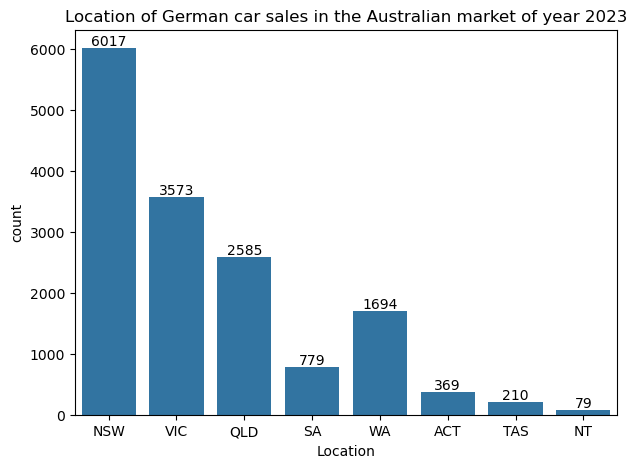

In [25]:
plt.figure(figsize=(7,5))
ax = sns.countplot(data=data, x='Location')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Location of German car sales in the Australian market of year 2023')
plt.show()

We can see most of the cars were selling in NSW back in 2023, which aligns with the population distribution of Australia. [[Source]](https://www.worldatlas.com/articles/the-largest-states-and-territories-of-australia.html)

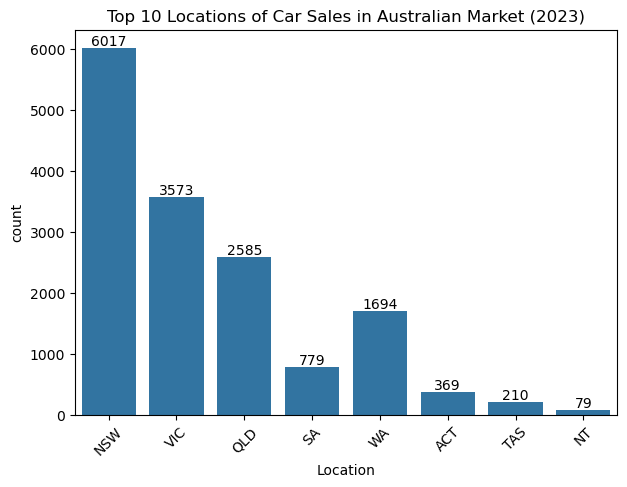

In [27]:
top_locations = data['Location'].value_counts().head(10).index
plt.figure(figsize=(7,5))
ax = sns.countplot(data=data[data['Location'].isin(top_locations)], x='Location')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Top 10 Locations of Car Sales in Australian Market (2023)')
plt.xticks(rotation=45)
plt.show()

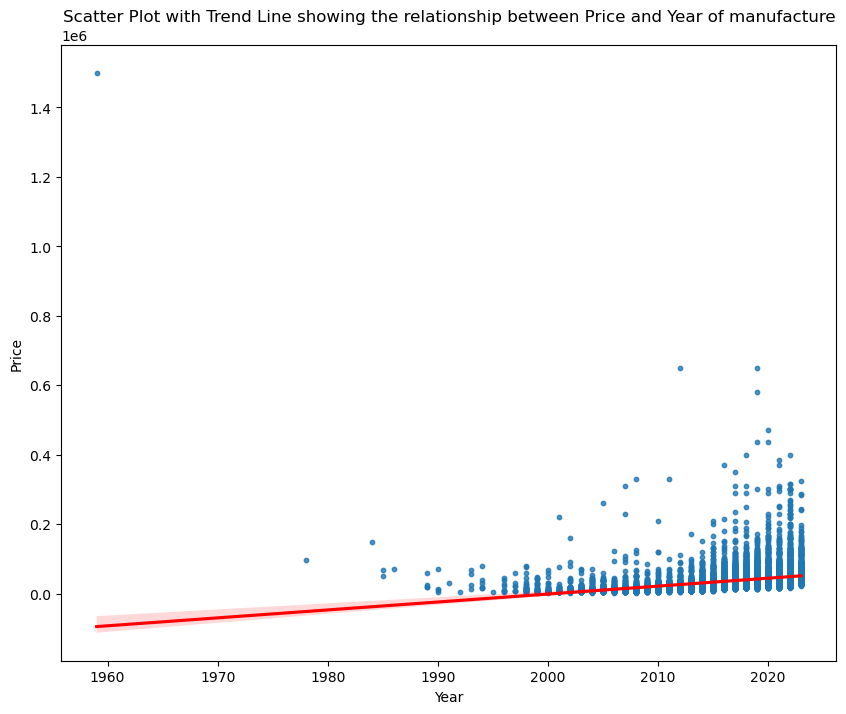

In [28]:
plt.figure(figsize=(10,8))
sns.regplot(data=data, x='Year', y='Price', scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.title('Scatter Plot with Trend Line showing the relationship between Price and Year of manufacture')
plt.show()

We can see the trends of the rising price accompanied with the newer  manufacturing year.

This also aligns with our common sense, *i.e.* the newer the car the higher the price.

## Encoding

We encode the categorical features to integers with OrdinalEncoder and drop the original column for simplicity.

Frequency encoding is better than ordinal encoding for categorical data without a logical order because it gives a clearer and fairer numerical representation of the categories

In [32]:
# List of categorical columns to apply frequency encoding
categorical_cols = ['Brand', 'UsedOrNew', 'Transmission', 'DriveType', 'FuelType', 'Location', 'BodyType']
# Renaming the original 'data' DataFrame to 'clean' for direct modification
clean = data 
# Apply frequency encoding
for col in categorical_cols:
    freq_encoding = clean[col].value_counts() / len(clean)  # Calculate frequency of each category
    clean[col] = clean[col].map(freq_encoding)  # Replace categories with their frequency
clean.head(5)

,Brand,Year,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,Location,BodyType,Doors,Seats,Price,Displacement
0,0.003463,2022.0,0.028551,0.88266,0.190579,0.303410,8.7,5595.0,0.393114,0.425585,4.0,7.0,51990.0,2.2
1,0.014047,2022.0,0.937802,0.88266,0.431595,0.208676,6.7,16.0,0.393114,0.167777,5.0,5.0,19990.0,1.5
2,0.028159,2022.0,0.937802,0.88266,0.139488,0.208676,6.6,8472.0,0.393114,0.019469,2.0,4.0,108988.0,2.0
3,0.037110,2011.0,0.937802,0.88266,0.139488,0.208676,11.0,136517.0,0.393114,0.019469,2.0,4.0,32990.0,5.5
4,0.009800,2022.0,0.937802,0.88266,0.431595,0.439436,6.0,1035.0,0.393114,0.425585,4.0,5.0,34990.0,1.3


In [33]:
# Check columns in the data DataFrame
print(clean.columns)

Index(['Brand', 'Year', 'UsedOrNew', 'Transmission', 'DriveType', 'FuelType',
       'FuelConsumption', 'Kilometres', 'Location', 'BodyType', 'Doors',
       'Seats', 'Price', 'Displacement'],
      dtype='object')


Now this ```clean``` will be used for following tasks. We check the shape and statistic info.

In [35]:
print(clean.shape)
clean.describe(include="all")

(15306, 14)


,Brand,Year,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,Location,BodyType,Doors,Seats,Price,Displacement
count,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,15306.000000,1.530600e+04,15306.000000
mean,0.067445,2016.025676,0.881420,0.792858,0.283265,0.330284,7.741051,101290.290017,0.253190,0.254609,4.025740,5.121046,3.507147e+04,2.416477
std,0.048439,4.993409,0.218940,0.246307,0.133259,0.113353,2.137879,78140.256535,0.125256,0.151449,0.670905,1.055260,3.185882e+04,0.836184
min,0.000065,1959.000000,0.028551,0.117340,0.039135,0.000261,0.000000,1.000000,0.005161,0.000653,2.000000,2.000000,8.800000e+01,0.700000
25%,0.035280,2013.000000,0.937802,0.882660,0.190579,0.208676,6.700000,42852.250000,0.168888,0.126682,4.000000,5.000000,1.895000e+04,2.000000
50%,0.064746,2017.000000,0.937802,0.882660,0.199203,0.303410,7.663661,86690.500000,0.233438,0.167777,4.000000,5.000000,2.895000e+04,2.400000
75%,0.070822,2020.000000,0.937802,0.882660,0.431595,0.439436,8.700000,147681.750000,0.393114,0.425585,4.000000,5.000000,4.199900e+04,2.800000
max,0.164772,2023.000000,0.937802,0.882660,0.431595,0.439436,27.000000,533849.000000,0.393114,0.425585,12.000000,22.000000,1.500000e+06,7.300000


In [36]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15306 entries, 0 to 16733
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            15306 non-null  float64
 1   Year             15306 non-null  float64
 2   UsedOrNew        15306 non-null  float64
 3   Transmission     15306 non-null  float64
 4   DriveType        15306 non-null  float64
 5   FuelType         15306 non-null  float64
 6   FuelConsumption  15306 non-null  float64
 7   Kilometres       15306 non-null  float64
 8   Location         15306 non-null  float64
 9   BodyType         15306 non-null  float64
 10  Doors            15306 non-null  float64
 11  Seats            15306 non-null  float64
 12  Price            15306 non-null  float64
 13  Displacement     15306 non-null  float64
dtypes: float64(14)
memory usage: 1.8 MB


We also plot the feature distribution to observe the value distribution of each feature.

## Feature Selection & Data Splitting

We first study the correlation between the price and other features.

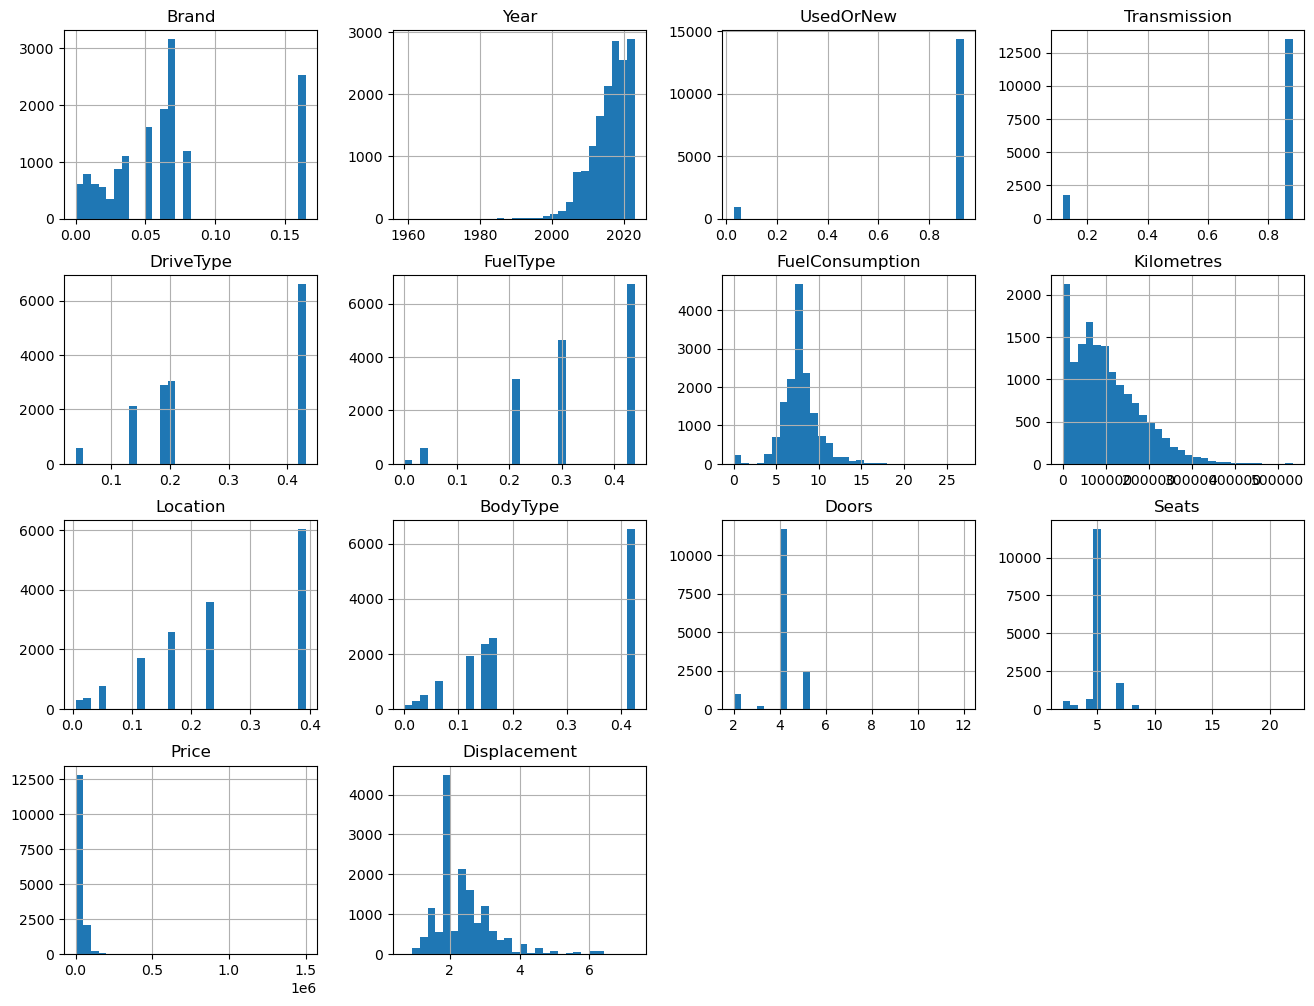

In [40]:
clean.hist(bins=30 ,figsize=(16,12))
plt.show()

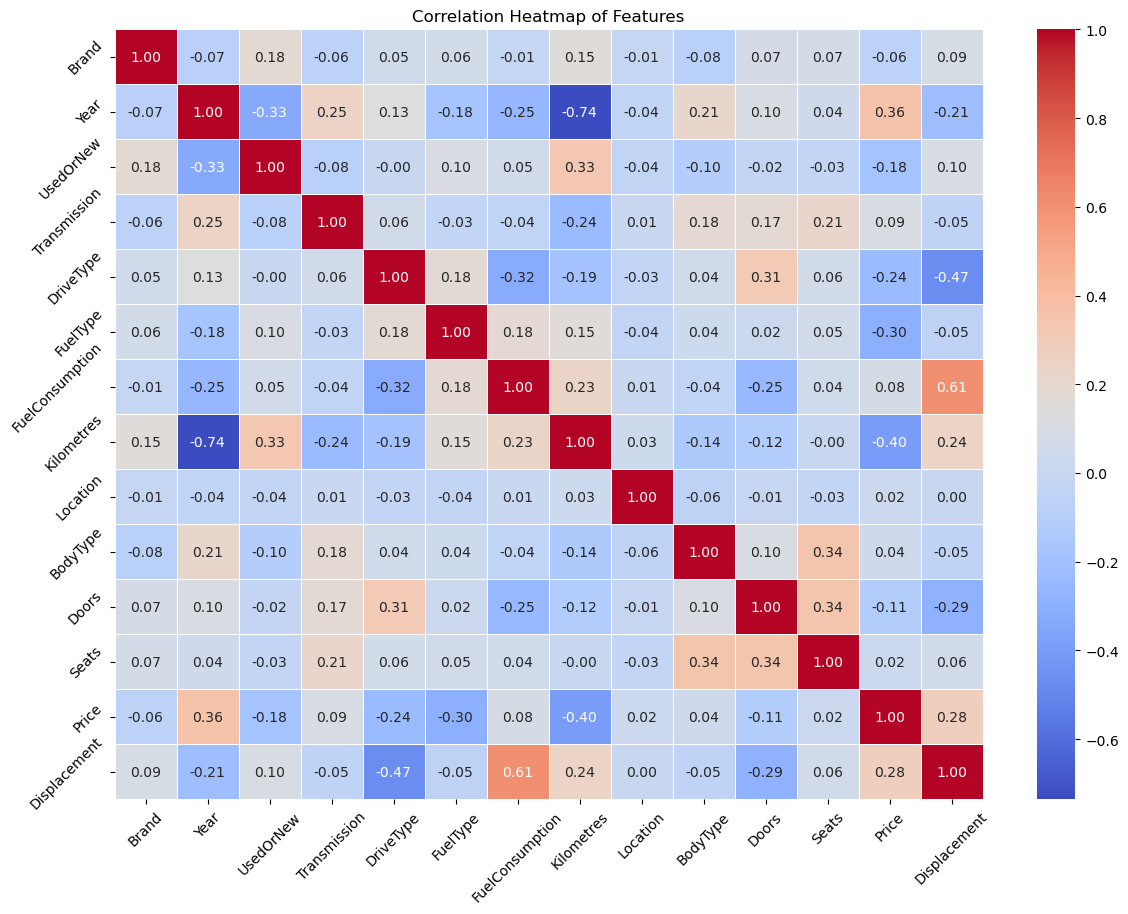

In [41]:
plt.figure(figsize=(14, 10))
sns.heatmap(clean.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Then we keep the 5-top most correlated features and split the dataset. We want the training set the size of 80% of full dataset.

In [43]:
X = clean[['Kilometres','Year','Displacement','DriveType','FuelConsumption']]
y = clean['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=student_id)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (12244, 5)
y_train shape:  (12244,)
X_test shape:  (3062, 5)
y_test shape:  (3062,)


## Model Training & Evaluating

We then train and evaluate several models.

### Linear Regression (LR)

We perform linear regression to check the performance.
As overfitiing and underftiitng will both decrease the model performance, we would like to avoid them.

In [46]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [47]:
# evaluate testing set
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("The results for testing set with LR:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

# evaluate training set
y_pred = regressor.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)
print("The results for train set with LR:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

The results for testing set with LR:
MSE: 565910562.5190418
Root MSE: 23788.874763616746
R^2: 0.3747584545260586
The results for train set with LR:
MSE: 681787598.2978529
Root MSE: 26111.06275695903
R^2: 0.3458548930529842


The model is likely experiencing underfitting. Underfitting occurs when a model is too simple to capture the underlying structure of the data, leading to poor performance on both the training and testing datasets.

### Decision Tree Regression (DTR)

We perform decision tree regression to check the performance. We want to tune the model so that it's not overfitting nor underfitting.

In [50]:
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [51]:
# evaluate testing set
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("The results for testing set with DTR:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

# evaluate training set
y_pred = regressor.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)
print("The results for training set with DTR:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

The results for testing set with DTR:
MSE: 769761335.9250956
Root MSE: 27744.573089616923
R^2: 0.14953563478734655
The results for training set with DTR:
MSE: 721888059.8843976
Root MSE: 26867.97461448104
R^2: 0.3073802701665538


The performance metrics indicate that the Decision Tree Regressor is not performing well on either the training or testing datasets. The high MSE and low R² values point to potential issues with overfitting or underfitting.

### Multi-Layer Perceptron (MLP)

We then deploy a MLP regressior and try to capture the inner non-linear relationship.

We would like a double hidden-layer structure with 100 and 100 for each layer respectively.

To save the calculation time, we would like to set the max_iteration as 1000.

In [54]:
regressor = MLPRegressor(
    solver='adam',
    activation='identity',
    alpha=0.0001,
    random_state=student_id,
    hidden_layer_sizes=(100,100),
    max_iter=1000
)

regressor.fit(X_train, y_train)

MLPRegressor(activation='identity', hidden_layer_sizes=(100, 100),
             max_iter=1000, random_state=47895810)

In [55]:
# evaluate testing set
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("The results for testing set with MLP:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

# evaluate training set
y_pred = regressor.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)
print("The results for training set with MLP:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

The results for testing set with MLP:
MSE: 743673852.6027884
Root MSE: 27270.38416676209
R^2: 0.1783581722522063
The results for training set with MLP:
MSE: 875521267.7349834
Root MSE: 29589.208636511106
R^2: 0.1599759884944637


The performance metrics for the Multilayer Perceptron indicate poor predictive performance, as evidenced by high MSE and low R² values for both training and testing datasets. The model appears to be underfitting the data, as it fails to capture the complexity of the relationships between features and the target variable.

### Random Forest

In [58]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Results for testing set with Random Forest Regressor:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

# Optionally, predict on the training set to evaluate overfitting
y_train_pred = rf_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nResults for training set with Random Forest Regressor:")
print("MSE:", train_mse)
print("Root MSE:", train_rmse)
print("R^2:", train_r2)

Results for testing set with Random Forest Regressor:
MSE: 293344934.49380046
Root MSE: 17127.315449123966
R^2: 0.6759003059009268

Results for training set with Random Forest Regressor:
MSE: 60871076.88505763
Root MSE: 7801.991853690802
R^2: 0.9415968885348359


The Random Forest Regressor demonstrates improved predictive performance compared to previous models, with a notable ability to explain the variance in vehicle prices. However, the disparity between the training and testing R² values (0.9416 vs. 0.6759) suggests a potential issue with overfitting, where the model performs exceptionally well on the training data but does not generalize as effectively to unseen data. Further steps may include hyperparameter tuning, additional feature selection, or even exploring ensemble techniques to enhance model robustness and accuracy.

## Conclusion and Visualisation

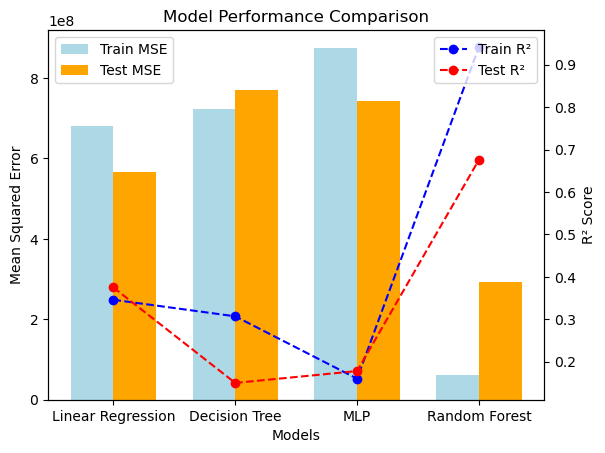

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Linear Regression', 'Decision Tree', 'MLP', 'Random Forest']
test_mse = [565910562.52, 769761335.93, 743673852.60, 293344934.49]
train_mse = [681787598.30, 721888059.88, 875521267.73, 60871076.89]
test_r2 = [0.375, 0.150, 0.178, 0.676]
train_r2 = [0.346, 0.307, 0.160, 0.942]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots()

# Create a bar chart for MSE
ax1.bar(x - width/2, train_mse, width, label='Train MSE', color='lightblue')
ax1.bar(x + width/2, test_mse, width, label='Test MSE', color='orange')

# Create a second y-axis for R² values
ax2 = ax1.twinx()  
ax2.plot(x, train_r2, label='Train R²', color='blue', marker='o', linestyle='--')
ax2.plot(x, test_r2, label='Test R²', color='red', marker='o', linestyle='--')

# Add labels, title, and legend
ax1.set_xlabel('Models')
ax1.set_ylabel('Mean Squared Error')
ax2.set_ylabel('R² Score')
ax1.set_title('Model Performance Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

## Overall Conclusion

The performance analysis reveals that the Random Forest Regressor significantly outperforms the other models in terms of prediction accuracy, as evidenced by its low MSE and high R² values. In contrast, the Linear Regression, Decision Tree, and MLP models exhibited considerable limitations, particularly in their inability to explain the variance in the data effectively. To enhance model performance in future analyses, it is crucial to explore advanced techniques such as feature engineering, hyperparameter tuning, and potentially incorporating ensemble methods that can leverage the strengths of multiple algorithms.